# SWMAL Exercise

## Implementing a dummy binary-classifier with fit-predict interface

We begin with the MNIST data-set and will reuse the data loader from Scikit-learn. Next we create a dummy classifier, and compare the results of the SGD and dummy classifiers using the MNIST data

#### Qa Load and display the MNIST data

Lenght of samples:  70000
Label for digit:  4


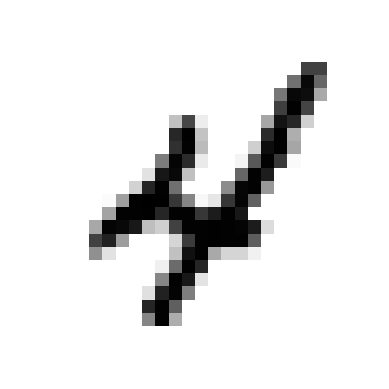

In [5]:
from sklearn.datasets import fetch_openml

# Get data set 
def MNIST_GetDataSet():
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False, parser = 'auto')
    X = X / 255.
    return X,y

# Plot the digit
%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

X,y = MNIST_GetDataSet()

X = X / 255.

print("Lenght of samples: ", len(X))
print("Label for digit: ", y[9])

digits_to_plot = X[9]

MNIST_PlotDigit(digits_to_plot)

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

Create a train-test data-set for MNIST and then add the `SGDClassifier` as done in [HOML], p.103.

Then we split the data and run the fit-predict for the classifier using the MNIST data.

Lastly we test our model using the test data, and plot the numbers that have been categorized correctly. 
Furthermore, we also find and plot some misclassified numbers.

X.shape=(70000, 784)
X.shape=(70000, 784)
Predicted Label: False


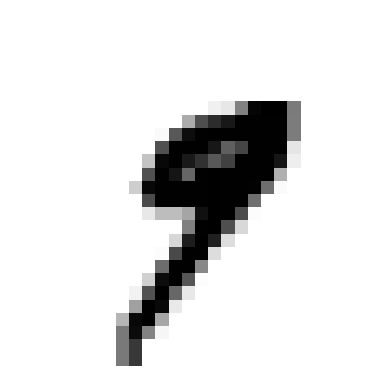

Predicted Label: False


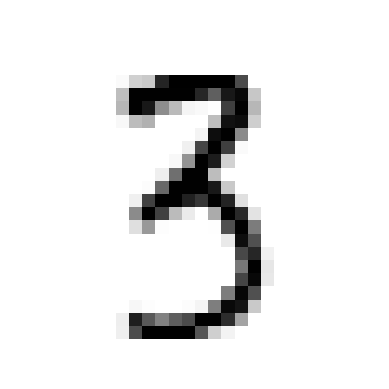

Predicted Label: False


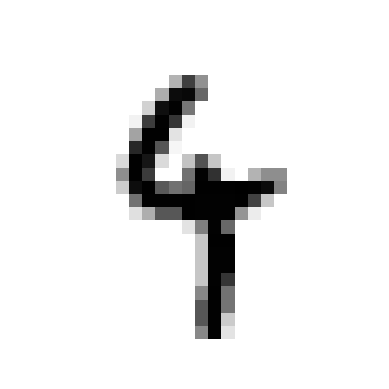

In [7]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np

# X is reshaped to an 2D array if not already
def reshape_X(X):
    if X.ndim==3:
        X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
    return X

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
X = reshape_X(X)
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create binary classifier for the target y_train_5 with 5 as the true digit
y_train_5 = (y_train == '5')
y_test_5  = (y_test == '5')

# Create SGD classifier
sgd_clf = SGDClassifier(random_state=42)

# Train using training data
sgd_clf.fit(X_train, y_train_5)

# Predict using test data
y_pred = sgd_clf.predict(X_test)

# Plot numbers that have been categorized correctly
correct = np.where(y_pred == y_test_5)[0]

for number in correct[:3]:
    MNIST_PlotDigit(X_test[number])
    # Predict if the digit is a 5 or not
    prediction = sgd_clf.predict([X_test[number]])  # Provide the data sample
    print(f"Predicted Label: {prediction[0]}")
    plt.show()
    

Predicted Label: False


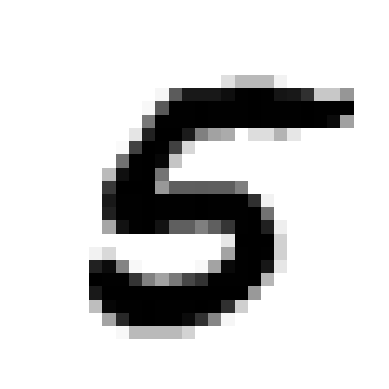

Predicted Label: False


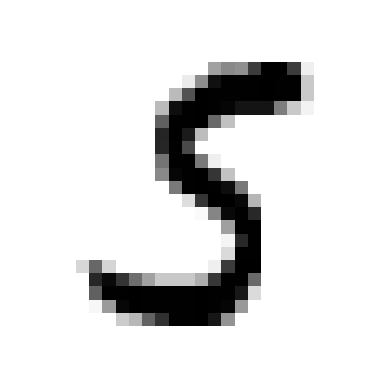

Predicted Label: False


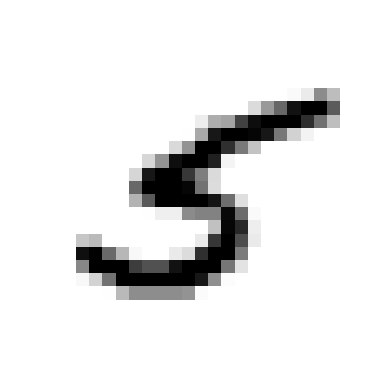

In [9]:
misclassified_number = np.where(y_pred != y_test_5)[0]
classified_number = np.where(y_pred == y_test_5)[0]

# Plot numbers that have been categorized correctly
for number in misclassified_number[:3]:
    MNIST_PlotDigit(X_test[number])
    # Predict if the digit is a 5 or not
    prediction = sgd_clf.predict([X_test[number]])  # Provide the data sample
    print(f"Predicted Label: {prediction[0]}")
    plt.show()

#### Qc Implement a dummy binary classifier

Now we will try to create a Scikit-learn compatible estimator implemented via a python class. 
We then call the fit-predict on a newly instantiated `DummyClassifier` object, 
and find a way to extract the accuracy `score` from the test data. 

Finally, we compare the accuracy score from our `DummyClassifier` 
with the scores found in [HOML] "Measuring Accuracy Using Cross-Validation", p.107.

In [14]:
from sklearn.metrics import accuracy_score

class DummyClassifier():
    def __init__(self):
        self.classes_ = None
        self.dummy_class_ = None

    def fit(self, X, y=None):
        self.classes_ = np.unique(y)
        self.dummy_class_ = np.argmax(np.bincount(y))
        return self
    
    def predict(self, X):
        return np.full(X.shape[0], fill_value=self.dummy_class_)
    
dummyClassifier = DummyClassifier()

dummyClassifier.fit(X_train, y_train_5)
y_pred = dummyClassifier.predict(X_train)

print(f"Any digit is a 5: {any(y_pred)}")
print(f"Accuracy score: {accuracy_score(y_train_5, y_pred)}")


Any digit is a 5: False
Accuracy score: 0.9095535714285714


### Qd Conclusion

In the exercise, we employed the SGDClassifier to train our MNIST dataset. 
The results of the exercise reveal that our training and testing phases yielded both accurate and inaccurate 
predictions. 
Evaluating the classifier's performance presents a challenge. 
Notably, our DummyClassifier achieved a 90% accuracy score by simply classifying every digit as non-5, since the
majority of digits in the dataset are indeed non-5 (constituting 90% of the data). 
However, this accuracy score fails to provide an accurate assessment of our model's fitness for the task at hand.
 
Consequently, we can infer that relying solely on accuracy as a performance metric is not advisable, particularly
when dealing with classifiers and datasets where certain classes are significantly more prevalent than others.

REVISIONS||
---------||
2018-12-19| CEF, initial.                  
2018-02-06| CEF, updated and spell checked. 
2018-02-08| CEF, minor text update.
2018-03-05| CEF, updated with SHN comments.
2019-09-02| CEF, updated for ITMAL v2.
2019-09-04| CEF, updated and added conclusion Q.
2020-01-25| CEF, F20 ITMAL update.
2020-02-04| CEF, updated page numbers to HOMLv2.
2020-09-03| CEF, E20 ITMAL update, udpated figs paths.
2020-09-06| CEF, added alt text.
2020-09-18| CEF, added binary-classifier text to Qb to emphasise 5/non-5 classification.
2021-01-12| CEF, F21 ITMAL update, moved revision tabel.
2021-08-02| CEF, update to E21 ITMAL.
2022-01-25| CEF, update to F22 SWMAL.
2023-02-07| CEF, update HOML page numbers.
